# Data Scientist Nanodegree

## Project: Write A Data Science Blog Post

### Laila Hussain Alqawain

In this project, I will go through The CRISP-DM Process for Stack Overflow Data - 2017 Survey.

## The CRISP-DM Process (Cross Industry Process for Data Mining)

1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy

## 1. Business Understanding


Q1: What are the most common Country, EmploymentStatus, FormalEducation, and Professional?<br>

Q2: what is the formal education has the highest career satisfaction by professional developer respondents?<br>

Q3: Which FormalEducation has the highest CareerSatisfaction? <br>

## 2. Data Understanding

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data
df = pd.read_csv('survey-results-public.csv')
schema = pd.read_csv('survey-results-schema.csv')

In [3]:
# Print the first five rows of df
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print number of rows and columns of df
df.shape

(51392, 154)

In [6]:
# Print 5 number summary of df
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### Q1: What are the most common Country, EmploymentStatus, FormalEducation, and Professional?

## 3. Prepare Data

In [8]:
# Columns name with 0 missing values.
columns_no_nulls = set(df.columns[df.isnull().mean()==0])

# Print columns_no_nulls
columns_no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

As we see from above, the columns are Country, EmploymentStatus, FormalEducation, and Professional with 0 missing values.

In [36]:
# Value counts of Professional status
prof = df['Professional'].value_counts()

# Print Professional status
prof

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [39]:
# Value counts of Top 10 Countries
country = df['Country'].value_counts().nlargest(10)

# Print Countries
country

United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Name: Country, dtype: int64

In [40]:
# Value counts of EmploymentStatus status
empstat = df['EmploymentStatus'].value_counts()

# Print EmploymentStatus status
empstat

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [41]:
# Value counts of FormalEducation status
formedu = df['FormalEducation'].value_counts()

# Print FormalEducation status
formedu

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

## 4. Data Modeling

### The Most Respondents by Professional

Text(0, 0.5, 'Proportion')

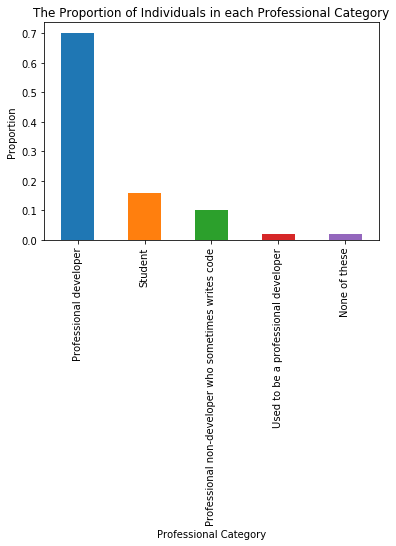

In [44]:
# Create bar chart of the proportion of individuals in each professional category 
(prof/df.shape[0]).plot(kind="bar");
plt.title("The Proportion of Individuals in each Professional Category");
plt.xlabel('Professional Category')
plt.ylabel('Proportion')

### The Most Respondents by The Country

Text(0, 0.5, 'Proportion')

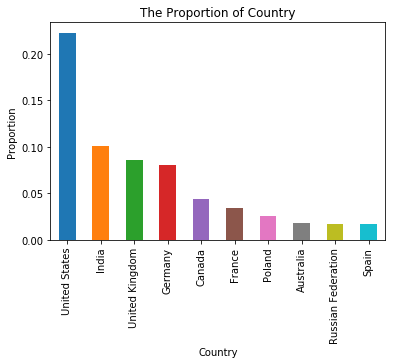

In [45]:
# Create bar chart of the proportion of individuals in each professional category 
(country/df.shape[0]).plot(kind="bar");
plt.title("The Proportion of Country");
plt.xlabel('Country')
plt.ylabel('Proportion')

### The Most Respondents by Employment Status

Text(0, 0.5, 'Proportion')

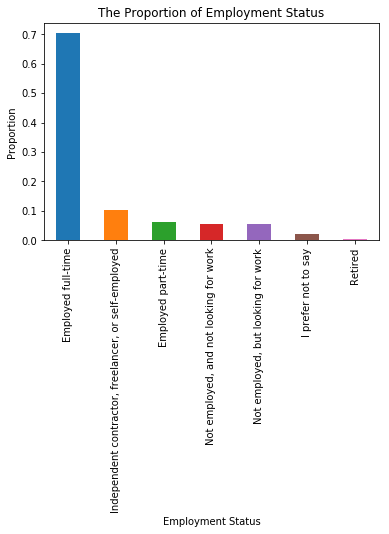

In [46]:
# Create bar chart of the proportion of individuals in each professional category 
(empstat/df.shape[0]).plot(kind="bar");
plt.title("The Proportion of Employment Status");
plt.xlabel('Employment Status')
plt.ylabel('Proportion')

### The Most Respondents by Formal Education

Text(0, 0.5, 'Proportion')

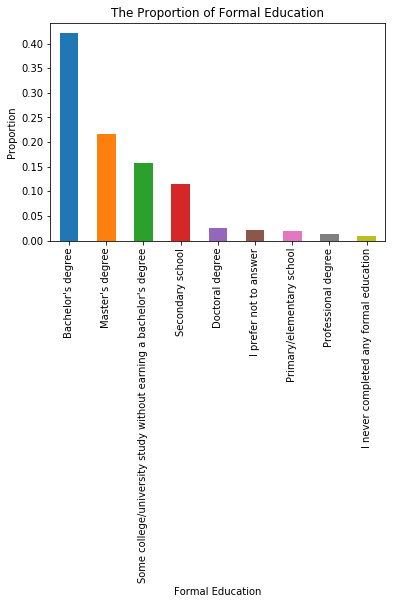

In [47]:
# Create bar chart of the proportion of individuals in each professional category 
(formedu/df.shape[0]).plot(kind="bar");
plt.title("The Proportion of Formal Education");
plt.xlabel('Formal Education')
plt.ylabel('Proportion')

## 5. Evaluate the Results

From The Bar plots above, most respondents are Professional Developer, from the United States, Employed full-time and have a Bachelor's degree.    

### Q2: What is the FormalEducation has the highest CareerSatisfaction by Professional Developer respondents?

## 3. Prepare Data

In [48]:
# Value counts of Career Satisfaction
careersat = df['CareerSatisfaction'].value_counts()

# Print Career Satisfaction
careersat

8.0     11037
7.0      9384
9.0      5579
10.0     5408
6.0      4721
5.0      3070
4.0      1352
3.0      1046
2.0       495
0.0       392
1.0       211
Name: CareerSatisfaction, dtype: int64

In [59]:
# Create new dataframe for Professional developer and group by FormalEducation and  average of CareerSatisfaction
top_careersat_edu = pd.DataFrame(df.query("Professional == 'Professional developer'").groupby(['FormalEducation']).mean()['CareerSatisfaction'])

In [60]:
# Display the top_careersat_edu dataset 
top_careersat_edu

,CareerSatisfaction
FormalEducation,
Bachelor's degree,7.393390
Doctoral degree,7.621967
I never completed any formal education,7.258824
I prefer not to answer,7.236769
Master's degree,7.347347
Primary/elementary school,7.467662
Professional degree,7.513915
Secondary school,7.538291
Some college/university study without earning a bachelor's degree,7.568763


## 4. Data Modeling

### The FormalEducation has the highest CareerSatisfaction by Professional Developer respondents

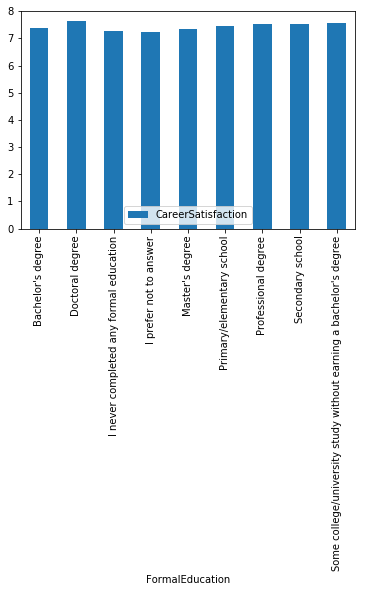

In [61]:
# Create Bar plot for top_careersat_edu
top_careersat_edu.plot(kind = "bar");

## 5. Evaluate the Results

From the bar plot above, the FormalEducation has the highest CareerSatisfaction by Professional Developer respondents is **Doctoral degree = 7.62**.

### Q3: What is the EmploymentStatus has the highest CareerSatisfaction by Professional Developer respondents?

## 3. Prepare Data

In [62]:
# Value counts of EmploymentStatus
empstat = df['EmploymentStatus'].value_counts()

# Print EmploymentStatus
empstat

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [63]:
# Create new dataframe for Professional developer and group by EmploymentStatus and  average of CareerSatisfaction
top_careersat_emp = pd.DataFrame(df.query("Professional == 'Professional developer'").groupby(['EmploymentStatus']).mean()['CareerSatisfaction'])

In [64]:
# Display the top_careersat_emp dataset 
top_careersat_emp

,CareerSatisfaction
EmploymentStatus,
Employed full-time,7.429230
Employed part-time,7.392477
I prefer not to say,6.955307
"Independent contractor, freelancer, or self-employed",7.613482
"Not employed, and not looking for work",6.826446
"Not employed, but looking for work",5.838780
Retired,7.600000


## 4. Data Modeling

### The EmploymentStatus has the highest CareerSatisfaction by Professional Developer respondents

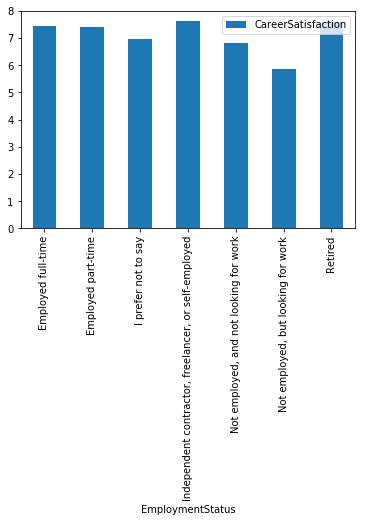

In [65]:
# Create Bar plot for top_careersat_emp
top_careersat_emp.plot(kind = "bar");

## 5. Evaluate the Results

From the bar plot above, the EmploymentStatus has the highest CareerSatisfaction by Professional Developer respondents is **Independent contractor, freelancer, or self-employed = 7.61**.